# Measures of central tendency and dispersion

Course: Elementary Statistics / R  
Author: timo.varelmann@uni-koeln.de  
Version: 0.1 Preliminary (Version 1.0 will cover all measures and visualisations after we've been dealing with them)  
Date: 13.11.2018

In descriptive statistics, we differentiate:
- measures of central tendency (Lageparameter) like mode, median, mean
- measures of dispersion (Streuungsparameter) like range, inter quartile range, variance or standard deviation.

This notebook covers these measures.

### Frequency and mode

Values may occur a single time or repeatedly. Say you encounter 6 swans whose is color is:

In [2]:
swans <- c("white", "white", "black","white","white","black")

Your observations can be summarised in a table:

| black | white |
|-------|-------|
|   2   |   4   |

In R, `table()` provides a summary table:

In [8]:
table(swans)

swans
black white 
    2     4 

The **mode** is the value that was observed most frequently. In the example above, the mode is "white":

In [20]:
which.max(table(swans))

white 
    2

`which.max(table())` returns:
- the mode
- the position of the mode within the frequency table (which is maximum? it's the second value of the table above)

... `max(table())` would provide the highest number of oberservations.

This textbook-example of calculation of mode has some disadvantages:

A piece of music shows the following chords:

In [18]:
chords <- c("C","G","a","d","G","C")

table(chords)

which.max(table(chords))

chords
a C d G 
1 2 1 2 

C 
2

The mode actually is C and G, both chords have 2 obsersations.

Functions of the which-family always take the first element for which the conditions hold. Within the frequency table, C is the leftmost or first value for which max(table()) applies.

Here is my alternative function:

In [22]:
modus <- function(x) table(x)[which(table(x) == max(table(x)))]

In [24]:
modus(chords)

x
C G 
2 2 

#### Relative frequency

The relative frequency is calculated by:

$\frac{frequency}{sample size}$

This can be literally translated to R code:

In [29]:
table(chords)/length(chords)

chords
        a         C         d         G 
0.1666667 0.3333333 0.1666667 0.3333333 

Alternatively, use function `prop.table(table())`:

In [34]:
prop.table(table(chords))

chords
        a         C         d         G 
0.1666667 0.3333333 0.1666667 0.3333333 

*Mode*

In these examples, qualitative data have been used. For quantitative discrete data it also makes sense to calculate the mode. 

Regarding scales, calculation of the mode is meaningful for nominal scaled data (like chords, colour of swans, ...) and above (ordinal, interval, ratio).

### Median, Quartiles, Ranges

For ordinal scaled data and above, calculation of the median is meaningful.

The median separates lower and upper half of an ordered set of observations.

Take a look at this vector:

In [55]:
myval <- c(1,3,8,3,4,5,6,2,9)

To understand the calculation of the median, first arrange the numbers by order form smallest to largest value. Use function `sort()`

In [56]:
print(sort(myval))

[1] 1 2 3 3 4 5 6 8 9


The value in the centre of the arranged data is the median. Here, it's 4.

R provides function `median()`:

In [57]:
median(myval)

[1] 4

Vector `myval` has 9 elements; what if a set of data has an even size?

Take a look at this vector:

In [49]:
myval2 <- c(3,7,1,1,4,6)
print(sort(myval2))

[1] 1 1 3 4 6 7


Which value separates the ordered set of values into two equal sets? It must be a value between 3 and 4.

This is calculated by:

In [51]:
(3+4)/2

[1] 3.5

In [53]:
median(myval2)

[1] 3.5

When dealing with ordinal scaled data, i.e. with data without equality of intervals, we only state that the median is between 3 and 4.   
The exact value of 3.5 is not meaningful here.

### Quantiles

After separation of the ordered obervations into an equal upper lower half by the median, we may go on and evenly separate each half.

For sorted myval, number 3 separates the lower half (1,2,3,3,4) and number 6 separated the upper half (4,5,6,8,9) of the data set.

Further, 1 is the smallest value (first element of sorted myval), and 9 is the largest value (last value of sorted myval).

Function `quantile()` returns these values:

In [62]:
print(sort(myval))

print(quantile(myval))

[1] 1 2 3 3 4 5 6 8 9
  0%  25%  50%  75% 100% 
   1    3    4    6    9 


| value of vector | interpretation |
|-----------------|----------------|
| 9 | 100% : maximum |
| 6 | 75% : the 3rd quartile |
| 4 | 50% : the 2nd quartile or median |
| 3 | 25% : the 1rst quartile |
| 1 | 0% : minimum |

For interval or ratio scaled values, the distance metrics of range is meaningful.

We may calculate the distance between max and min ($max - min$), which ist the *range*

or the distance between the third and the first quartile ($Q3-Q1$), which is the *inter-quartile-range* (IQR).

These are a measure of dispersion:

In [66]:
max(myval) - min(myval)

IQR(myval)

[1] 8

[1] 3

The visualitation of the boxplot nicely covers this:

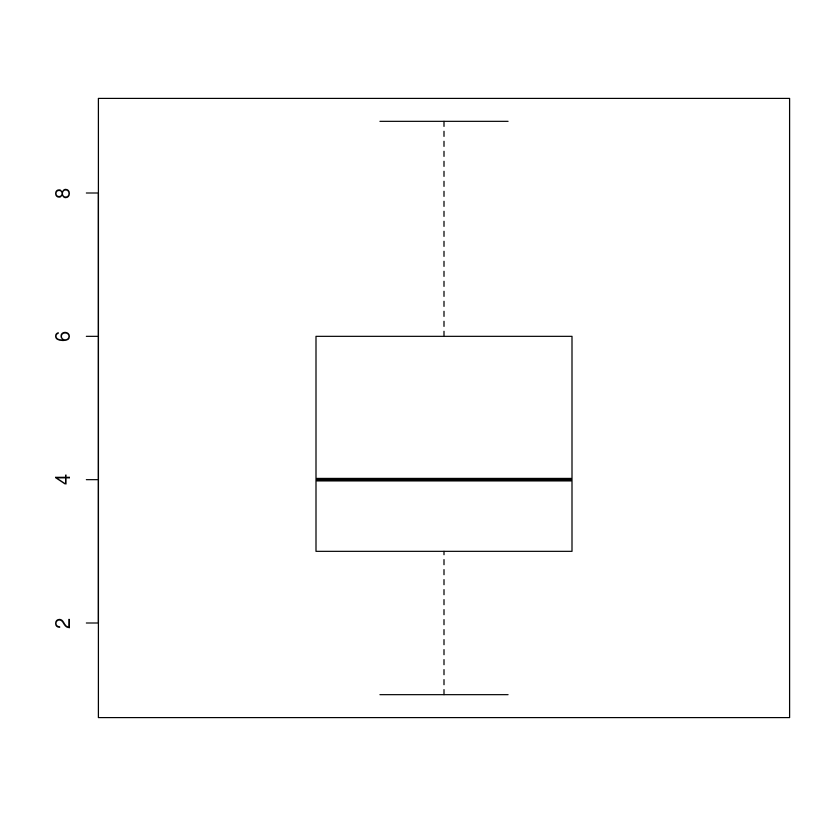

In [65]:
boxplot(myval)

### Arithmetic mean

For interval and ratio scaled data, calculating a sum is a permitted operation, because equality of differences between the values is given.

The arithmetic mean is a measure of central tendency. It is calculated by summing up all values of elements in a set of obeservations, and dividing this sum by the number of elements 

$$\frac{1}{n}\sum_{i=1}^n{x_i}$$

It's meaningful only for interval and ratio scaled data.

Use this formula to calculate the arithmetic mean of myval:

In [75]:
(myval[1] + myval[2] + myval[3] + myval[4] + myval[5] + myval[6] + myval[7] + myval[8] + myval[9]) / length(myval)

[1] 4.555556

Or:

In [74]:
sum(myval)/length(myval)

[1] 4.555556

Function `mean()` immediately calculates the arithmetic mean in R:

In [70]:
mean(myval)

[1] 4.555556

### Variance

The variance is the arithmetic mean of squared distances between single observations and their arithmetic mean.

$$\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2 $$

It's meaningful for interval and ratio scaled data.

To understand this metric of dispersion, take a look at distances of single oberservations and their arithmetic mean for the numbers 1, 3, 5 and 9.

In [81]:
a <- c(1,3,5,9)

In [82]:
print(a)
mean(a)
print(a - mean(a))

[1] 1 3 5 9


[1] 4.5

[1] -3.5 -1.5  0.5  4.5


The sum of these distances equals zero:

In [84]:
sum(a - mean(a))

[1] 0

This is always the case. The single observations are distributed around the mean. Their distances to the mean are positive and negative, and the sum of these distances is always 0. 

Though R may not represent this fact exactly:

In [86]:
sum(myval - mean(myval))

[1] 1.776357e-15

This small number, 0.0000000000000017763568390225, is due to the representation of the quotient $\frac{41}{9}$ (the mean of vector myval) in R, which is in decimals.

In [89]:
mean(myval)

[1] 4.555556

Squaring the distances only provides positive numbers:


In [98]:
print(a - mean(a))
print((a - mean(a))^2)

[1] -3.5 -1.5  0.5  4.5
[1] 12.25  2.25  0.25 20.25


In [100]:
sum((a - mean(a))^2)

[1] 35

For calculation of the sample variance, this sum is divided by n:

In [101]:
sum((a - mean(a))^2)/length(a)

[1] 8.75

In R, variance `var()` is calculated by dividing the sum of squared distances by n-1:

In [102]:
sum((a - mean(a))^2)/(length(a)-1)

[1] 11.66667

In [103]:
var(a)

[1] 11.66667

$$\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2 $$

Division by n-1 always returns a larger value than division by n. 

Why dividing squared distances by n-1? This is related to the estimation of dispersion parameters for whole populations, not samples of n obervations. The sample variance *underestimates* the unknown population variance. We will come back to this issue when dealing with population parameters.

### Standard Deviation

Variance is a squared metrics, not operating in the units of the actual data. 

The square root of the variance provides a measure of dispersion that operates in the units of data:

$$\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2} $$

In R, use function `sd()` to calculate it:

In [104]:
sd(a)

[1] 3.41565

This is the square root of var(a):

In [105]:
sd(a) == sqrt(var(a))

[1] TRUE